
# Conway’s Game of Life

## Student name: Harshithbabu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys, argparse
from IPython.display import display, clear_output



ON = 255
OFF = 0
GREY = 100
vals = [ON, OFF]

In [2]:
#randonGrid(N) gives random grid of N*N having life cell with value 255 and dead cell with value 0
def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
#Glider is the the most common stable figures with 5 live cells and other stable figures are Blinker, block, boat, Tub
#Mango, Beehive etc.
def addGlider(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    #print(grid)
    glider = np.array([[0,0, 255],
                    [255, 0, 255],
                    [0, 255, 255]])
    grid[i:i+3, j:j+3] = glider
    return(grid)

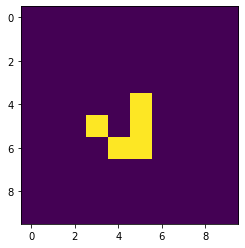

In [50]:
#image show of Glider in 10*10 grid
glider = np.zeros(10*10).reshape(10,10)
glider[4][5] = glider[5][3] = 255
glider[5][5] = glider[6][4] = glider[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(glider, interpolation='nearest')

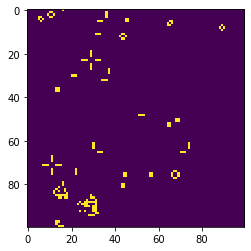

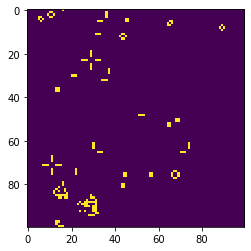

In [36]:
#Gosper glider, tub, blank ,beehive and so may patterns are observed in this
gun = np.zeros(100*100).reshape(100,100)
gun[4][5] = gun[4][6] = 255
gun[5][5] = gun[5][4] = gun[6][5] = 255

fig, ax = plt.subplots()
img = ax.imshow(randomGrid(100), interpolation='nearest')
animate = lambda i: update(10,img,gun,100)
for i in range(1103): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

In [28]:
#The first gun to be found in Conway's Game of Life was the Gosper glider gun
def addGosperGliderGun(i, j, grid):
    """adds a Gosper Glider Gun with top left cell at (i, j)"""
    gun = np.zeros(11*38).reshape(11,38)
    gun[5][1] = gun[5][2] = 255
    gun[6][1] = gun[6][2] = 255
    
    gun[3][13] = gun[3][14] = 255
    gun[4][12] = gun[4][16] = 255
    gun[5][11] = gun[5][17] = 255
    gun[6][11] = gun[6][15] = gun[6][17]= gun[6][18]  = 255
    gun[7][11] = gun[7][17] = 255
    gun[8][12] = gun[8][16] = 255
    gun[9][13] = gun[9][14] = 255
    
    gun[1][25] = 255
    gun[2][23] = gun[2][25] = 255
    gun[3][21] = gun[3][22] = 255
    gun[4][21] = gun[4][22] = 255
    gun[5][21] = gun[5][22] = 255
    gun[6][23] = gun[6][25] = 255
    gun[7][25] = 255
    gun[3][35] = gun[3][36] = 255
    gun[4][35] = gun[4][36] = 255
    grid[i:i+11, j:j+38] = gun
    return gun

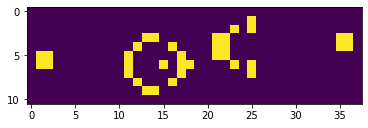

In [33]:
fig, ax = plt.subplots()
img = ax.imshow(addGosperGliderGun(1,1,randomGrid(100)), interpolation='nearest')

In [5]:
#This func for change the given grid using the rules of Conway's Game of life
#Conway’s rules stipulate that a live cell will die at the next time step if Total ≤ 1 or total ≥ 4,
#and survives otherwise. A dead cell remains dead unless total = 3, in which case the cell
#becomes alive.



def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

Model Highlife

In [6]:
#A variant of the original Game of Life with one additional rule:
#a dead cell comes to life if it is surrounded by 6 living cells.
def highlife(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if (total == 3) or (total == 6): #another rule  : a dead cell comes to life if it is sur-
#rounded by 6 living cells
                    newGrid[i, j] = ON
            
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

Model The Immigration Game.

In [7]:
#Thisis a variant of the original Game of Life, identical to it except that it is played with cell of
#two colors and any newborn cell is colored according to the majority color of its 3 living neighbors.
def immi(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            total1 = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/100)
            # apply Conway's rules
            #here white is one type of life and grey is another type of life
            a=total+total1#total number of both typer of living cells

            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            elif grid[i,j] == GREY:
                if (total1 < 2) or (total1 > 3):
                    newGrid[i, j] = OFF
            else:
                if (a==3):
                    if total == 2:
                        newGrid[i,j] == ON
                    elif total1 == 2 :
                        newGrid[i,j] == GREY
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

2) Include as a new option in the program to start with the R-pentomino
pattern shown in Fig. 1a.

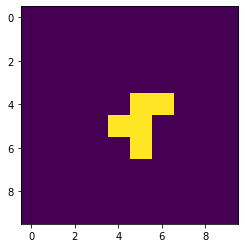

In [8]:
#image show of R-pentomino pattern in 10*10 grid
rp = np.zeros(10*10).reshape(10,10)
rp[4][5] = rp[4][6] = 255
rp[5][5] = rp[5][4] = rp[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(rp, interpolation='nearest')

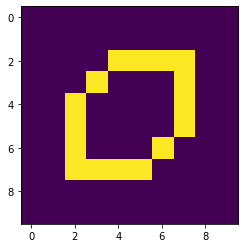

In [9]:
#image show of Replicator pattern in 10*10
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
fig, ax = plt.subplots()
img = ax.imshow(rep, interpolation='nearest')

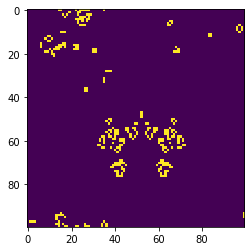

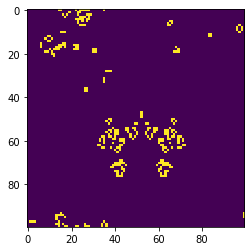

In [38]:
#R-pentomino is the most active pattern with fewer than six cells
rp = np.zeros(100*100).reshape(100,100)
rp[4][5] = rp[4][6] = 255
rp[5][5] = rp[5][4] = rp[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(rp, interpolation='nearest')
animate = lambda i: update(10,img,rp,100) #using update func as many times as generation we need
for i in range(500): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)
plt.show()

3) Model The Immigration Game

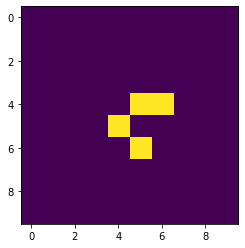

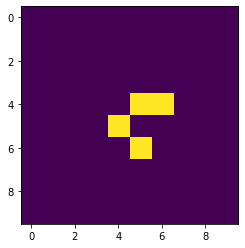

In [41]:
#Thisis a variant of the original Game of Life, identical to it except that it is played with cell of
#two colors and any newborn cell is colored according to the majority color of its 3 living neighbors.
rp = np.zeros(10*10).reshape(10,10)
rp[4][5] = rp[4][6] = 255
rp[5][5] = rp[5][4] = rp[6][5] = 255
fig, ax = plt.subplots()
img = ax.imshow(rp, interpolation='nearest')
animate = lambda i: immi(10,img,rp,10)
for i in range(1): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

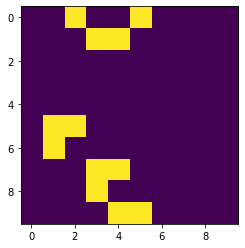

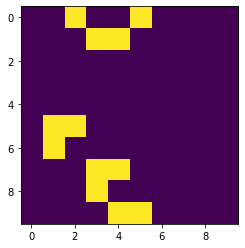

In [42]:
#for some random grid of 10*10
fig, ax = plt.subplots()
img = ax.imshow(randomGrid(10), interpolation='nearest')
animate = lambda i: immi(10,img,randomGrid(10),10)
for i in range(69): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

#it didn't give any grey life because the initial grid doesn't contain any grey life

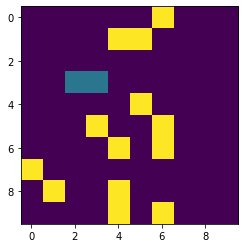

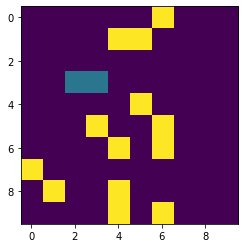

In [44]:
#for some random grid of 10*10 with some grey life using glider with grey life cells at position [0,0]
def addGlider1(i, j, grid):
    """adds a glider with top left cell at (i, j)"""
    #print(grid)
    glider = np.array([[0,0, 100],
                    [100, 0, 100],
                    [0, 100, 100]])
    grid[i:i+3, j:j+3] = glider
    return(grid)
fig, ax = plt.subplots()
img = ax.imshow(randomGrid(10), interpolation='nearest')
animate = lambda i: immi(10,img,addGlider1(1,1,randomGrid(10)),10)
for i in range(69): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

4) The model Highlife

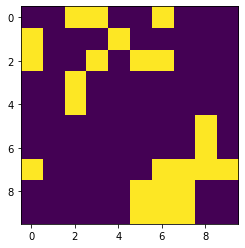

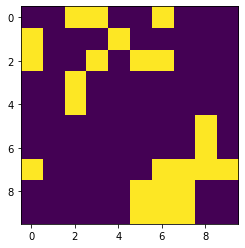

In [16]:
#a variant of theoriginal Game of Life with one additional rule: a dead cell comes to life if it is sur-
#rounded by 6 living cells.

fig, ax = plt.subplots()
img = ax.imshow(randomGrid(10), interpolation='nearest')
animate = lambda i: highlife(10,img,randomGrid(10),10)
for i in range(10): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

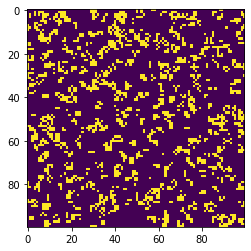

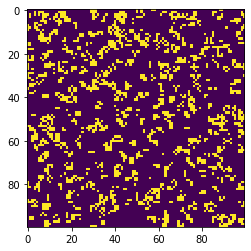

In [20]:
#for 100*100 grid
fig, ax = plt.subplots()
img = ax.imshow(randomGrid(100), interpolation='nearest')
animate = lambda i: highlife(10,img,randomGrid(100),100)
for i in range(69): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

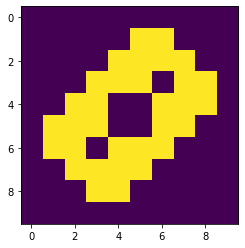

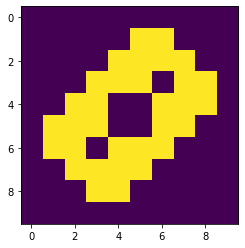

In [47]:
#for replicator 
rep = np.zeros(10*10).reshape(10,10)
rep[2][4]=rep[2][5]=rep[2][6]=rep[2][7]=rep[3][7]=255
rep[4][7]=rep[5][7]=rep[3][3]=rep[4][2]=rep[5][2]=255
rep[6][2]=rep[7][2]=rep[7][3]=rep[7][4]=rep[7][5]=255
rep[6][6]=255
fig, ax = plt.subplots()
img = ax.imshow(rep, interpolation='nearest')
animate = lambda i: highlife(10,img,rep,10)
for i in range(1): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()

5) Model The Rainbow Game of Life

In [18]:
def rain(frameNum, img, grid, N):
    
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
        # compute 8-neghbor sum
        # using toroidal boundary conditions - x and y wrap around
        # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                        grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                        grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                        grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
            
            # apply Conway's rules
            if grid[i, j] == OFF:
                if (total == 1) :
                    newGrid[i, j] = GREY
    # update data
    #print(newGrid,grid)    
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

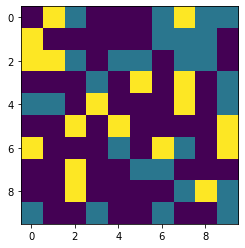

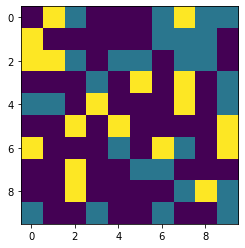

In [49]:
fig, ax = plt.subplots()
img = ax.imshow(rep, interpolation='nearest')
animate = lambda i: rain(10,img,randomGrid(10),10)
for i in range(1): #no of generations
    animate(i)
    clear_output(wait=True)
    display(fig)

plt.show()